(1797, 64)


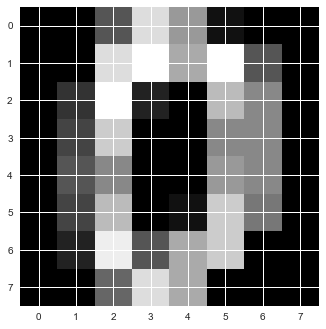

In [10]:
from sklearn.datasets import load_digits
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer#标签二值化
from sklearn.cross_validation import train_test_split #数据切分
%matplotlib inline
plt.style.use('seaborn')
#digits=load_digits()
#print(digits.data.shape)

#plt.imshow(digits.images[0],cmap='gray')#1979张图片，对数字进行分类

In [27]:
from sklearn.datasets import load_digits
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer#标签二值化
from sklearn.cross_validation import train_test_split #数据切分

In [30]:
#构建一个3层网络，输入层，隐藏层，输出层
def sigmoid(x):
    return 1/(1+np.exp(-x))
def dsigmoid(x):
    return x*(1-x)
class NeuralNetWork:
    def __init__(self,layers):
        #权值初始化，范围-1到1
        self.V=np.random.random((layers[0]+1,layers[1]+1))*2-1
        self.W=np.random.random((layers[1]+1,layers[2]))*2-1
    def train(self,X,y,lr=0.11,epochs=10000):
        temp=np.ones([X.shape[0],X.shape[1]+1])
        temp[:,0:-1]=X
        X=temp
        for n in  range(epochs+1):
            i=np.random.randint(X.shape[0])
            x=[X[i]]
            x=np.atleast_2d(x)
            L1=sigmoid(np.dot(x,self.V))
            L2=sigmoid(np.dot(L1,self.W))
            L2_delta=(y[i]-L2)*dsigmoid(L2)
            L1_delta=L2_delta.dot(self.W.T)*dsigmoid(L1)
            self.W+=lr*L1.T.dot(L2_delta)
            self.V+=lr*x.T.dot(L1_delta)
            if n%1000==0:
                predictions=[]
                for j in range(X_test.shape[0]):
                    o=self.predict(X_test[j])
                    predictions.append(np.argmax(o))#获取预测结果
                accuracy=np.mean(np.equal(predictions,y_test))
                print("epochs",n,"accuracy",accuracy)
    def predict(self,x):
        temp=np.ones(x.shape[0]+1)
        temp[0:-1]=x
        x=temp
        x=np.atleast_2d(x)
        L1=sigmoid(np.dot(x,self.V))
        L2=sigmoid(np.dot(L1,self.W))
        return L2
digits=load_digits()
X=digits.data
y=digits.target
#数据归一化
X-=X.min()
X/=X.max()
nm=NeuralNetWork([64,100,10])
X_train,X_test,y_train,y_test=train_test_split(X,y)#分隔数据默认0.25
labels_train=LabelBinarizer().fit_transform(y_train)#输出层取值一般为0或1
labels_test=LabelBinarizer().fit_transform(y_test)
print("start")
nm.train(X_train,labels_train,epochs=20000)
print("end")

start
epochs 0 accuracy 0.09111111111111111
epochs 1000 accuracy 0.43777777777777777
epochs 2000 accuracy 0.6911111111111111
epochs 3000 accuracy 0.7733333333333333
epochs 4000 accuracy 0.7844444444444445
epochs 5000 accuracy 0.8222222222222222
epochs 6000 accuracy 0.8288888888888889
epochs 7000 accuracy 0.8288888888888889
epochs 8000 accuracy 0.8333333333333334
epochs 9000 accuracy 0.8355555555555556
epochs 10000 accuracy 0.8377777777777777
epochs 11000 accuracy 0.8444444444444444
epochs 12000 accuracy 0.9466666666666667
epochs 13000 accuracy 0.9511111111111111
epochs 14000 accuracy 0.9533333333333334
epochs 15000 accuracy 0.9688888888888889
epochs 16000 accuracy 0.9688888888888889
epochs 17000 accuracy 0.96
epochs 18000 accuracy 0.9466666666666667
epochs 19000 accuracy 0.9711111111111111
epochs 20000 accuracy 0.9688888888888889
end
